In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text
import shutil
import numpy as np

In [11]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
mpl.rcParams['font.size'] = 18

In [1]:
from common import files, utils
from collections import deque
import re, io


def parse_par(parline):
    Ls = parline.replace('. ','.\n').splitlines()[:-1]
    i = 1 
    while i < len(Ls):
        if not Ls[i][0].isupper():
            Ls[i-1] = ' '.join([Ls[i-1],Ls[i]])
            Ls.pop(i)
        else:
            i+=1
    return Ls
#parse_par(raw.readlines()[2])
def split_pars(rawlines):
    rawlines = deque(rawlines)
    frag_start = re.compile("\[##Fragment_\d+##\]")
    frag_end = re.compile("\[@@Fragment_\d+@@\]")
    title = rawlines.popleft().strip() if not frag_start.match(rawlines[0]) else None
    curr_par_n= 0
    curr_par = [] # num, title, content
    pars = []
    for l in rawlines:
        print("Line: " + l)
        if frag_start.match(l):
            curr_par_n +=1
            curr_par.append(curr_par_n)
        elif frag_end.match(l):
            if len(curr_par) == 1:
                print(f"Fragment {curr_par_n} is empty")
            elif len(curr_par) == 2:
                print(f"Fragment {curr_par_n} has no title")
                pars.append(tuple([curr_par[0],None,curr_par[-1]]))
                curr_par.clear()
            else:  
                pars.append(tuple(curr_par))
                curr_par.clear()
        else:
            curr_par.append(l.strip())
    return pars
        
def parse_doc(reader):
    out = io.StringIO()
    lines = [l.decode('utf-8') for l in reader.readlines()] # decode lines
    print(lines)
    for n,tit,con in split_pars(lines):
        print(f'{n,tit,con}')
        out.write(f'=========={n},{tit}============\n')
        out.write('\n'.join(parse_par(con))+'\n')
    return out

f = files.zipped('../data/Wydobywanie_struktury.zip')
raw = files.open_zipped(f,'23_Wydobywanie_struktury/200008_na_tropie_podmorskiego_z.txt') 
split_pars([l.decode('utf-8') for l in raw.readlines()])


Line: [##Fragment_1##]

Line: Paul Johnson zerka na monitor, na obrazy ze znajdującej się trzy kilometry niżej bezkresnej pustki dna północnego Pacyfiku. Ten ekran jest jego iluminatorem dzięki zdalnemu oku podmorskiego robota Jasona umocowanego na końcu naszpikowanej przewodami elektrycznymi i światłowodami liny, zwisającej ze statku badawczego Thomas G. Thompson. Z rękami założonymi na piersi Johnson spogląda na technika kierującego pracą robota z fotela w sterowni statku. Cała załoga już od 13-tu godzin odbywa wirtualną wędrówkę po bezkresach dna oceanu, ale teraz Johnson nie chce zrezygnować ze zbliżających się emocji. Dzieli ich już tylko 30 min od wprowadzenia do otworu w dnie prawie dwumetrowego węża pompy, zanim zostanie ona uruchomiona. Na bladym obrazie monitora Johnson widzi ponad otworem wodę migoczącą gorącymi odblaskami — to dobywające się spod dna strumienie, Johnson zaś wierzy, że coś w nich żyje... lub kiedyś żyło. Operator oddycha głęboko, pociąga łyk kawy i przekręca

[(1,
  None,
  'Paul Johnson zerka na monitor, na obrazy ze znajdującej się trzy kilometry niżej bezkresnej pustki dna północnego Pacyfiku. Ten ekran jest jego iluminatorem dzięki zdalnemu oku podmorskiego robota Jasona umocowanego na końcu naszpikowanej przewodami elektrycznymi i światłowodami liny, zwisającej ze statku badawczego Thomas G. Thompson. Z rękami założonymi na piersi Johnson spogląda na technika kierującego pracą robota z fotela w sterowni statku. Cała załoga już od 13-tu godzin odbywa wirtualną wędrówkę po bezkresach dna oceanu, ale teraz Johnson nie chce zrezygnować ze zbliżających się emocji. Dzieli ich już tylko 30 min od wprowadzenia do otworu w dnie prawie dwumetrowego węża pompy, zanim zostanie ona uruchomiona. Na bladym obrazie monitora Johnson widzi ponad otworem wodę migoczącą gorącymi odblaskami — to dobywające się spod dna strumienie, Johnson zaś wierzy, że coś w nich żyje... lub kiedyś żyło. Operator oddycha głęboko, pociąga łyk kawy i przekręca główkę dżojst

In [2]:
from datasets import small_pl
small_pl.make_embeddings(small_pl.get(),'pl_cnn',embedder='cnn')

d:\misc\projects\python\magister\data\Wydobywanie_struktury.zip found: True
Making sentence embeddings...
Loading sentence bert...
Loading sentence bert done in 2.55 s
Embedding sentences:[..........][100/100] => DONE [0h 0min 45s][eta: 0h 0min 0s]   xt [0h 0min 45s][eta: 0h 0min 0s]   min 16s]   n 32s]   
Making sentence embeddings done in 51.78 s


In [10]:
from models import sentence_bert as sbert
import numpy as np
sb = sbert.get('trans')
a = ['fsfs fsklf fslksjf lksmfslfkjeslk msfslkefelkf esksejflksfj', 'fsijoifsjijes foieiomife oisjfio iefisjfip msif piisjij']
b = ['fsfodsk fksfso fdokfs fsokfs foksf', 'fsok fsokfs fsokfsokf sfoksfoskf', 'fsfsf fsfs fs sfs fs s sf sf sf']
r = []
r.append(sb(a).numpy())
r.append(sb(b).numpy())
np.vstack(r).shape

Loading sentence bert...
Loading sentence bert done in 0.00 s


(5, 512)

In [1]:
from datasets import wikiset
wikiset.make_embeddings(wikiset.get('dev'),'wiki_segments_dev_trans')

d:\misc\projects\python\magister\data\wiki_727K.tar.bz2 found: True
d:\misc\projects\python\magister\data\wiki_test_50.tar.bz2 found: True
Making sentence embeddings...
Loading sentence bert...
Loading sentence bert done in 7.59 s


KeyboardInterrupt: 

In [31]:
## load embeddings
import numpy as np
from datasets import EmbeddedDataset
from algorithms import segments
import matplotlib.pyplot as plt
with EmbeddedDataset('wiki_segments_trans_300.npz') as ds:
    print(ds.get_embeddings()[-10:-1])
    seg, emb = ds.get_file('wiki_727/train/12/94/82/1294820')
    print(np.min(ds.segment_lengths()))
    print(seg)
    print(segments.tags_to_array(seg))


['wiki_727/train/70/89/92/7089929_emb', 'wiki_727/train/76/37/83/7637839_emb', 'wiki_727/train/80/25/99/8025991_emb', 'wiki_727/train/84/57/21/8457216_emb', 'wiki_727/train/93/55/71/9355715_emb', 'wiki_727/train/93/55/71/9355719_emb', 'wiki_727/train/93/67/65/9367657_emb', 'wiki_727/train/96/84/64/9684644_emb', 'wiki_727/train/96/96/58/9696580_emb']
3
[ 0  0  0  0  0  0  1  1  1  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  3  3  3  3  3  3  3  3  4  4  4  4  5  5  5  5  5  5  5  5
  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
  6  6  6  6  6  6  6  7  7  7  7  7  7  7  8  8  8  8  8  8  8 10 10 10
 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11
 11 11 12 12 12 12 12 13 13 13 14 14 14 14 14 14 14 16 16 16 16 16 18 18
 18 18 18 18 18 18 18 18 19 19 19 19 19 19 19 19 19 19 19 19 19 19 20 20
 20 21 21 21 21 21 21 21 21]
[0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 

[(57, 57), (73, 73), (65, 65), (65, 65), (66, 66), (60, 60), (79, 79), (75, 75), (81, 81), (74, 74)]
[(57, 57), (73, 73), (65, 65), (65, 65), (66, 66), (60, 60), (79, 79), (75, 75), (81, 81), (74, 74)]


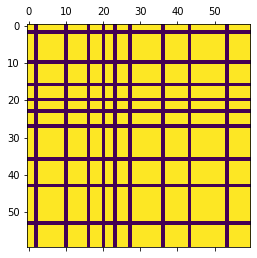

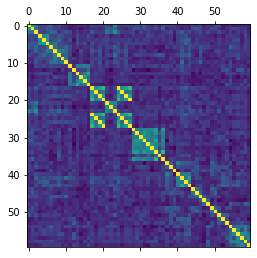

In [14]:
def make_segmat(seg,emb):
    segs = segments.tags_to_array(seg)
    ezemb = np.ones_like(emb[:,0]) * segs
    return np.array([[1-np.clip(i+j,0,1) for j in ezemb] for i in ezemb])

with EmbeddedDataset('choi_segments.npz') as ds:
    Es = ds.get_embeddings()[0:10]
    elist = [np.inner(e,e) for e in ds[Es]]
    ylist = [make_segmat(ds[ds.segmentation(e)],ds[e]) for e in Es]

print([e.shape for e in elist])
print([y.shape for y in ylist])
plt.matshow(ylist[5])
plt.matshow(elist[5])


array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

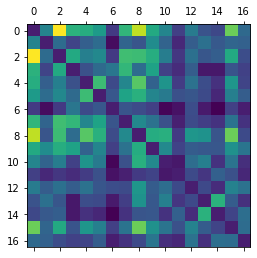

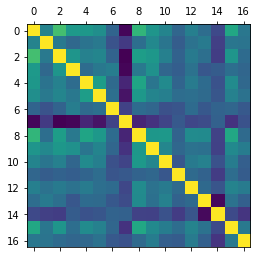

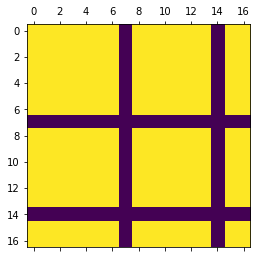

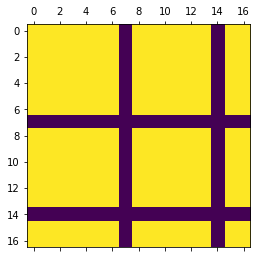

In [15]:
from algorithms import segments
from scipy import signal

mat = np.inner(emb,emb)
segs = segments.tags_to_array(seg)
import matplotlib.pyplot as plt
plt.matshow(mat - np.identity(mat.shape[0]))
eemb = emb * (((segs+1)*-2)+3)[:,np.newaxis]
ezemb = np.ones_like(emb) * segs[:,np.newaxis]
plt.matshow(np.inner(eemb,eemb))
def make_segmat(seg,emb):
    segs = segments.tags_to_array(seg)
    ezemb = np.ones_like(emb[:,0]) * segs
    return np.array([[1-np.clip(i+j,0,1) for j in ezemb] for i in ezemb])

plt.matshow(make_segmat(seg,emb))
plt.matshow(np.mean(mat)*make_segmat(seg,emb))

In [9]:
import tensorflow as tf
autoencoder = tf.keras.models.load_model('models/autoencoder-100e-10k')

In [79]:
import tensorflow as tf
input = tf.keras.layers.Input(shape=(None,None, 1))

# Encoder
ds = tf.keras.layers.BatchNormalization()(input)
x = tf.keras.layers.Conv2D(16, (5, 5), activation='tanh', padding="same")(ds)
x = tf.keras.layers.Conv2D(1, (3, 3), padding="same")(x)
ds = tf.keras.layers.Add()([x,ds])

x = tf.keras.layers.Conv2D(16, (5, 5), activation='tanh', padding="same")(ds)
x = tf.keras.layers.Conv2D(1, (3, 3), padding="same")(x)
ds = tf.keras.layers.Add()([x,ds])

x = tf.keras.layers.Conv2D(16, (5, 5), activation='tanh', padding="same")(ds)
x = tf.keras.layers.Conv2D(1, (3, 3), padding="same")(x)
ds =tf.keras.layers.Add()([x,ds])

x = tf.keras.layers.Conv2D(16, (5, 5), activation='tanh', padding="same")(ds)
x = tf.keras.layers.Conv2D(1, (3, 3), padding="same")(x)
ds = tf.keras.layers.Add()([x,ds])

x = tf.keras.layers.Conv2D(16, (5, 5), activation='tanh', padding="same")(ds)
x = tf.keras.layers.Conv2D(1, (3, 3), padding="same")(x)
ds = tf.keras.layers.Add()([x,ds])

x = tf.keras.layers.Conv2D(16, (5, 5), activation='tanh', padding="same")(ds)
x = tf.keras.layers.Conv2D(1, (3, 3), padding="same")(x)
ds = tf.keras.layers.Add()([x,ds])

x = tf.keras.layers.Conv2D(16, (5, 5), activation='tanh', padding="same")(ds)
x = tf.keras.layers.Conv2D(1, (3, 3), padding="same")(x)
ds = tf.keras.layers.Add()([x,ds])

x = tf.keras.layers.Conv2D(16, (5, 5), activation='tanh', padding="same")(ds)
x = tf.keras.layers.Conv2D(1, (3, 3), padding="same")(x)
ds = tf.keras.layers.Add()([x,ds])

x = tf.keras.layers.Conv2D(16, (5, 5), activation='tanh', padding="same")(ds)
x = tf.keras.layers.Conv2D(1, (3, 3), padding="same")(x)
ds = tf.keras.layers.Add()([x,ds])

x = tf.keras.layers.Conv2D(16, (5, 5), activation='tanh', padding="same")(ds)
x = tf.keras.layers.Conv2D(1, (3, 3), padding="same")(x)
ds = tf.keras.layers.Add()([x,ds])

x = tf.keras.layers.Conv2D(16, (5, 5), activation='tanh', padding="same")(ds)
x = tf.keras.layers.Conv2D(1, (3, 3), padding="same")(x)
ds = tf.keras.layers.Add()([x,ds])

x = tf.keras.layers.Conv2D(16, (5, 5), activation='tanh', padding="same")(ds)
x = tf.keras.layers.Conv2D(1, (3, 3), padding="same")(x)
ds = tf.keras.layers.Add()([x,ds])

x = tf.keras.layers.Conv2D(16, (5, 5), activation='tanh', padding="same")(ds)
x = tf.keras.layers.Conv2D(1, (3, 3), padding="same")(x)
ds = tf.keras.layers.Add()([x,ds])

x = tf.keras.layers.Conv2D(16, (5, 5), activation='tanh', padding="same")(ds)
x = tf.keras.layers.Conv2D(1, (3, 3), padding="same")(x)
ds = tf.keras.layers.Add()([x,ds])

x = tf.keras.layers.Conv2D(16, (5, 5), activation='tanh', padding="same")(ds)
x = tf.keras.layers.Conv2D(1, (3, 3), padding="same")(x)
ds = tf.keras.layers.Add()([x,ds])

x = tf.keras.layers.Conv2D(16, (5, 5), activation='tanh', padding="same")(ds)
x = tf.keras.layers.Conv2D(1, (3, 3), padding="same")(x)
ds = tf.keras.layers.Add()([x,ds])

x = tf.keras.layers.Conv2D(16, (5, 5), activation='tanh', padding="same")(ds)
x = tf.keras.layers.Conv2D(1, (3, 3), padding="same")(x)
ds = tf.keras.layers.Add()([x,ds])

x = tf.keras.layers.Conv2D(16, (5, 5), activation='tanh', padding="same")(ds)
x = tf.keras.layers.Conv2D(1, (3, 3), padding="same")(x)
ds = tf.keras.layers.Add()([x,ds])


autoencoder = tf.keras.Model(input, ds)
mat = np.inner(emb,emb)
autoencoder(np.reshape(mat,(1,*mat.shape,1)))
autoencoder.summary()

Model: "model_15"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_20 (InputLayer)          [(None, None, None,  0           []                               
                                 1)]                                                              
                                                                                                  
 batch_normalization_16 (BatchN  (None, None, None,   4          ['input_20[0][0]']               
 ormalization)                  1)                                                                
                                                                                                  
 conv2d_105 (Conv2D)            (None, None, None,   416         ['batch_normalization_16[0][0]'] 
                                16)                                                        

In [64]:
from math import floor
import tensorflow as tf
class Wiki727Sequence(tf.keras.utils.Sequence):

    def __init__(self, emb_dataset, batch_size):
        self.emb_ds = emb_dataset
        self.emb_ds.open()
        self.batch_size = batch_size
        self.segs_keys = self.emb_ds.get_segments()
        self.embs_keys = self.emb_ds.get_segments()
        self.len = len(self.segs_keys)
        self.emb_ds.close()

    def __len__(self):
        return floor(self.len/self.batch_size)

    def __getitem__(self, idx):
        self.emb_ds.open()
        Es = self.emb_ds.get_embeddings()[idx*self.batch_size : (idx + 1)*self.batch_size]
        
        batch_x = [np.inner(e,e) for e in self.emb_ds[Es]]

        batch_y = tf.ragged.constant([[make_segmat(self.emb_ds[ds.segmentation(e)],self.emb_ds[e]) for e in Es]])
        self.emb_ds.close()
        print(batch_x.shape)

        return batch_x,batch_y

In [80]:
from common import stage
epochs = 100
loss_fn = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.Adam()

with EmbeddedDataset('wiki_segments.npz') as ds:
    ksegs, kembs = ds.get_segments(), ds.get_embeddings()
    last_loss = 0
    for epoch in range(epochs):
        bar = stage.ProgressBar(f"Epoch [{epoch}/{epochs}] (Loss: {last_loss})",len(ksegs)-10)
        last_loss = 0
        for step in range(len(ksegs)-10):
            bar.update(kembs[step])
            emb, seg = ds[kembs[step]], ds[ksegs[step]]
            X = np.inner(emb,emb)
            X = np.reshape(X,(1,*X.shape,1))
            Y = make_segmat(seg,emb)
            Y = np.reshape(Y,(1,*Y.shape,1))

            with tf.GradientTape() as tape:
                output = autoencoder(X,training= True)
                lossval = loss_fn(Y,output)
            grads = tape.gradient(lossval,autoencoder.trainable_weights)
            optimizer.apply_gradients(zip(grads,autoencoder.trainable_weights))
            last_loss += lossval
        bar.end()


    

Epoch [0/100] (Loss: 0):[..........][40/40] => DONE [0h 0min 26s][eta: 0h 0min 0s]    0min 0s]    
Epoch [1/100] (Loss: 23.579456329345703):[..........][40/40] => DONE [0h 0min 26s][eta: 0h 0min 0s]    0min 0s]    
Epoch [2/100] (Loss: 7.588850021362305):[..........][40/40] => DONE [0h 0min 26s][eta: 0h 0min 0s]    0min 0s]    
Epoch [3/100] (Loss: 7.336544513702393):[..........][40/40] => DONE [0h 0min 28s][eta: 0h 0min 0s]    0min 0s]    
Epoch [4/100] (Loss: 7.1948466300964355):[..........][40/40] => DONE [0h 0min 30s][eta: 0h 0min 0s]    0min 0s]    
Epoch [5/100] (Loss: 7.110968589782715):[..........][40/40] => DONE [0h 0min 26s][eta: 0h 0min 0s]    0min 0s]    
Epoch [6/100] (Loss: 7.0641584396362305):[..........][40/40] => DONE [0h 0min 26s][eta: 0h 0min 0s]    0min 0s]    
Epoch [7/100] (Loss: 7.034617900848389):[..........][40/40] => DONE [0h 0min 25s][eta: 0h 0min 0s]    0min 0s]    
Epoch [8/100] (Loss: 7.008620262145996):[..........][40/40] => DONE [0h 0min 25s][eta: 0h 0mi

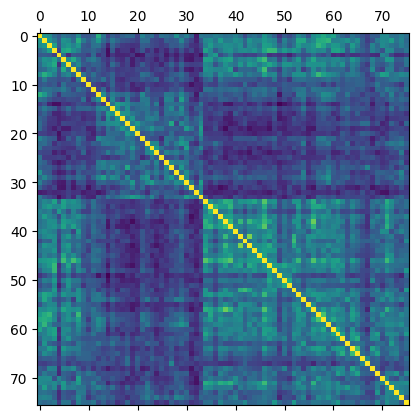

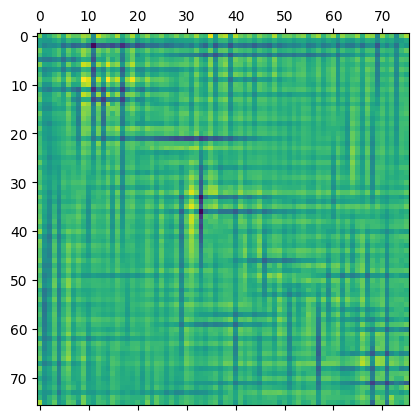

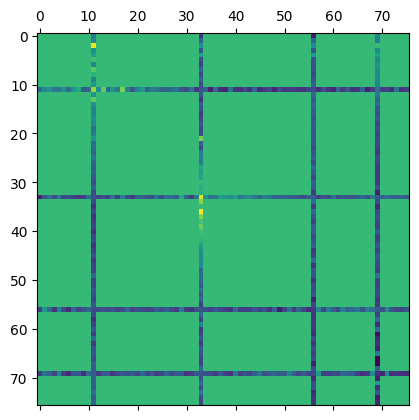

In [10]:
mat = np.inner(emb,emb)
x= np.reshape(mat,(1,*mat.shape,1))
y=autoencoder(x)
plt.matshow(mat)
plt.matshow(np.reshape(y,mat.shape))
plt.matshow(1-(np.reshape(y,mat.shape)*(1-make_segmat(seg,emb))))

In [82]:
autoencoder.save('models/autoencoder-100e-10k')

INFO:tensorflow:Assets written to: models/autoencoder-100e-10k\assets


INFO:tensorflow:Assets written to: models/autoencoder-100e-10k\assets


(177, 512)
[[ 0.01121824 -0.04884298 -0.01816592 ... -0.02734746 -0.03538588
  -0.05324334]
 [ 0.01985284 -0.02306883 -0.03288566 ... -0.02726456 -0.01232668
  -0.03433123]
 [ 0.03415528  0.01724535 -0.00035553 ... -0.04857348 -0.01594695
  -0.02155956]
 ...
 [-0.01567085 -0.0143671   0.07096677 ... -0.03202876 -0.07014536
  -0.07721077]
 [ 0.01807482 -0.02165476  0.05633271 ... -0.02410685 -0.03605366
  -0.06767423]
 [-0.00174053 -0.0059826   0.02334284 ...  0.02340716 -0.01111449
  -0.1164907 ]]
[0.46288258 0.4660153  0.3814867  0.31621855 0.4207476  0.3980555
 0.30864385 0.46474594 0.65603185 0.6495762  0.54490817 0.5396081
 0.5625347  0.3306581  0.48789728 0.6015561  0.4242937  0.4895287
 0.65213853 0.65997976 0.60955477 0.5243608  0.60859203 0.7311591
 0.7240666  0.5069784  0.61301607 0.5574012  0.56712085 0.67422867
 0.6732623  0.6714144  0.4611529  0.45930514 0.45771354 0.620877
 0.4467579  0.29320306 0.43287265 0.529982   0.5420959  0.4297741
 0.33804435 0.54431224 0.4937436  0

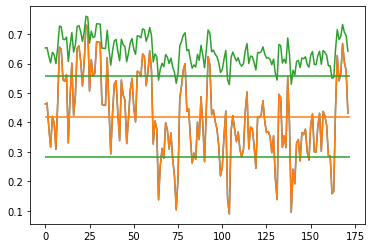

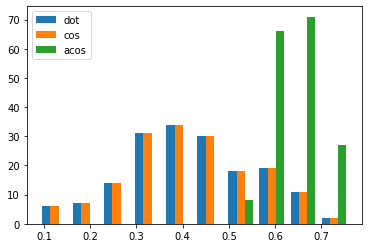

In [44]:
from algorithms import block_comparison

with EmbeddedDataset('wiki_segments_trans_300.npz') as ds:
    seg, emb = ds.get_file('wiki_727/train/12/94/82/1294820')
v = np.lib.stride_tricks.sliding_window_view(emb,3,0)
print(emb.shape)
v = block_comparison.encode_blocks(v,'v-mean')
print(v)
score = np.array([block_comparison.similarity_measure(v[i],v[i+3],'dot') for i in range(len(v)-3)])
score1 = np.array([block_comparison.similarity_measure(v[i],v[i+3],'cos') for i in range(len(v)-3)])
score2 = np.array([block_comparison.similarity_measure(v[i],v[i+3],'acos') for i in range(len(v)-3)])/np.pi
print(score)
plt.plot(score)
plt.plot(score1)
plt.plot(score2)
mean_cross = np.mean(score)
std_cross = np.std(score)
plt.hlines([mean_cross, mean_cross + std_cross, mean_cross-std_cross],0,len(score),colors=['C1','C2','C2'])
tau = np.mean(np.mean(score))-np.std(np.mean(score))
np.mean(score,0) > tau
plt.figure()
plt.hist([score,score1,score2],label= ['dot', 'cos','acos'])
plt.legend()

(40, 512), (1, 512)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

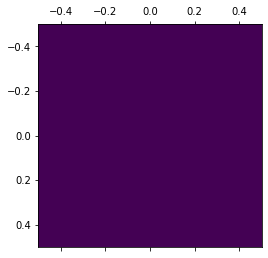

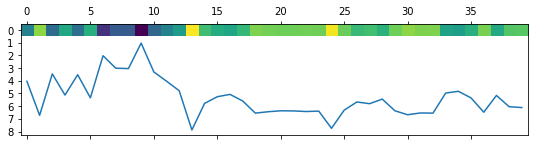

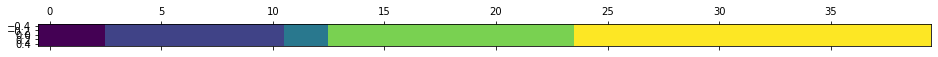

In [11]:
from datasets import EmbeddedDataset
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.vq import kmeans, whiten
with EmbeddedDataset('wiki_segments.npz') as ds:
    seg,emb = ds.get_file('data/123319')

e = whiten(emb, check_finite = False)
s,c = kmeans(e,1)
print(f'{emb.shape}, {s.shape}')
z = np.array([[k.dot(t) for k in emb] for t in s])
plt.matshow(np.array([[j.dot(i) for i in s] for j in s]))
plt.matshow(z)
plt.plot(z[0])

plt.matshow([seg])
np.argmax(z,0)

In [19]:
### block comparison of embedding
from algorithms import simple
import numpy as np
from scipy.cluster.vq import whiten

d = np.vstack([np.ones(10)*i] for i in range(5))
d = whiten(d)
print(d, d.shape)

v = np.lib.stride_tricks.sliding_window_view(d,3,0)
print(v, v.shape)

v = np.array([u/np.sqrt(u.dot(u.T)) for u in np.sum(v,2)])
print(v, v.shape)



[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.70710678 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678
  0.70710678 0.70710678 0.70710678 0.70710678]
 [1.41421356 1.41421356 1.41421356 1.41421356 1.41421356 1.41421356
  1.41421356 1.41421356 1.41421356 1.41421356]
 [2.12132034 2.12132034 2.12132034 2.12132034 2.12132034 2.12132034
  2.12132034 2.12132034 2.12132034 2.12132034]
 [2.82842712 2.82842712 2.82842712 2.82842712 2.82842712 2.82842712
  2.82842712 2.82842712 2.82842712 2.82842712]] (5, 10)
[[[0.         0.70710678 1.41421356]
  [0.         0.70710678 1.41421356]
  [0.         0.70710678 1.41421356]
  [0.         0.70710678 1.41421356]
  [0.         0.70710678 1.41421356]
  [0.         0.70710678 1.41421356]
  [0.         0.70710678 1.41421356]
  [0.         0.70710678 1.41421356]
  [0.         0.70710678 1.41421356]
  [0.         0.70710678 1.41421356]]

 [[0.70710678 1.41421356 2.12132034]
  [0.70710678 1

C:\Users\Radoslaw\AppData\Local\Temp/ipykernel_18280/1870392530.py:6: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  d = np.vstack([np.ones(10)*i] for i in range(5))


In [8]:
from datasets import choiset, wikiset
from common import files, stage
import numpy as np
import tensorflow_hub as hub
import tensorflow_text
import os, shutil

choiset.make_embeddings(choiset.get(),'choi_segments_cnn', 'cnn')
wikiset.make_embeddings(wikiset.get(),'wiki_segments')
wikiset.make_embeddings(wikiset.get(),'wiki_segments_cnn','cnn')

f:\progs\python\magister\data\Choi-3-11.zip found: True
Making sentence embeddings...
Loading sentence bert...
Loading sentence bert done in 0.00 s
Embedding sentences:[..........][300/300] => DONE [0h 2min 7s][eta: 0h 0min 0s]    0s]      
Making sentence embeddings done in 138.54 s
f:\progs\python\magister\data\wiki_727K.tar.bz2 found: True
f:\progs\python\magister\data\wiki_test_50.tar.bz2 found: True
Making sentence embeddings...
Loading sentence bert...
Loading sentence bert done in 0.00 s
Embedding sentences:[..........][50/50] => DONE [0h 1min 58s][eta: 0h 0min 0s]   n 0s]     
Making sentence embeddings done in 125.73 s
f:\progs\python\magister\data\wiki_727K.tar.bz2 found: True
f:\progs\python\magister\data\wiki_test_50.tar.bz2 found: True
Making sentence embeddings...
Loading sentence bert...
Loading sentence bert done in 0.00 s
Embedding sentences:[..........][50/50] => DONE [0h 0min 15s][eta: 0h 0min 0s]   n 0s]    
Making sentence embeddings done in 16.96 s


Evaluating:[..........][50/50] => DONE [0h 0min 0s][eta: 0h 0min 0s]   0min 0s]    
Evaluating:[..........][50/50] => DONE [0h 0min 0s][eta: 0h 0min 0s]   0min 0s]    
Evaluating:[..........][50/50] => DONE [0h 0min 0s][eta: 0h 0min 0s]   0min 0s]    
Evaluating:[..........][50/50] => DONE [0h 0min 0s][eta: 0h 0min 0s]   0min 0s]    
Evaluating:[..........][50/50] => DONE [0h 0min 0s][eta: 0h 0min 0s]   0min 0s]    
Evaluating:[..........][50/50] => DONE [0h 0min 0s][eta: 0h 0min 0s]   0min 0s]    
Evaluating:[..........][50/50] => DONE [0h 0min 0s][eta: 0h 0min 0s]   0min 0s]    
Evaluating:[..........][50/50] => DONE [0h 0min 0s][eta: 0h 0min 0s]   0min 0s]    
Evaluating:[..........][50/50] => DONE [0h 0min 0s][eta: 0h 0min 0s]   0min 0s]    
Evaluating:[..........][50/50] => DONE [0h 0min 0s][eta: 0h 0min 0s]   0min 0s]    
Evaluating:[..........][50/50] => DONE [0h 0min 0s][eta: 0h 0min 0s]   0min 0s]    
Evaluating:[..........][50/50] => DONE [0h 0min 0s][eta: 0h 0min 0s]   0min 

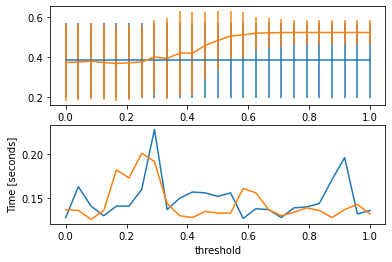

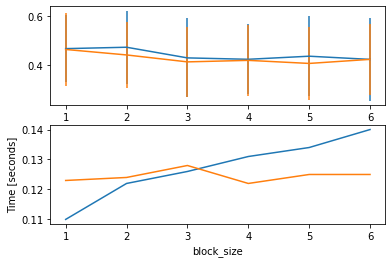

In [1]:
from evaluation import evaluate_segmenter
from algorithms import simple, graphseg, block_comparison
from datasets import EmbeddedDataset
import matplotlib.pyplot as plt
import numpy as np
import time


def evaluate_range(dataset,segmenter_factory,argname, values, window_range = 4,**kwargs):
    Ms, Ss = [], []
    Ts = []
    for x in values:
        seg = segmenter_factory(**{argname:x,**kwargs})
        start = time.time()
        p,w = evaluate_segmenter(dataset,seg,window_range)
        end = time.time()
        Ms.append(np.mean(p))
        Ss.append(np.std(w))
        Ts.append(end - start)
    plt.subplot(2,1,1)
    plt.errorbar(values,Ms,Ss)
    plt.subplot(2,1,2)
    plt.plot(values,Ts)
    plt.xlabel(argname)
    plt.ylabel("Time [seconds]")    

with EmbeddedDataset('wiki_segments.npz') as ds:
    evaluate_range(ds,block_comparison.with_params,"threshold",np.linspace(0.0,1,num=25),mode = 'max')
    evaluate_range(ds,block_comparison.with_params,"threshold",np.linspace(0.0,1,num=25),mode = 'mean')
    plt.figure()
    evaluate_range(ds,block_comparison.with_params,"block_size",[1,2,3,4,5,6],mode = 'max')
    evaluate_range(ds,block_comparison.with_params,"block_size",[1,2,3,4,5,6],mode = 'mean')


Evaluating:[..........][50/50] => DONE [0h 0min 5s][eta: 0h 0min 0s]   0min 0s]     
Evaluating:[..........][50/50] => DONE [0h 1min 11s][eta: 0h 0min 0s]   0min 0s]     
Evaluating:[..........][50/50] => DONE [0h 0min 1s][eta: 0h 0min 0s]   0min 0s]    
Evaluating:[..........][50/50] => DONE [0h 1min 39s][eta: 0h 0min 0s]   0min 0s]     
Evaluating:[..........][50/50] => DONE [0h 0min 0s][eta: 0h 0min 0s]   0min 0s]    
Evaluating:[..........][50/50] => DONE [0h 2min 25s][eta: 0h 0min 0s]   0min 0s]     
Evaluating:[..........][50/50] => DONE [0h 0min 0s][eta: 0h 0min 0s]   0min 0s]    
Evaluating:[..........][50/50] => DONE [0h 2min 59s][eta: 0h 0min 0s]   0min 0s]     
Evaluating:[..........][50/50] => DONE [0h 0min 0s][eta: 0h 0min 0s]   0min 0s]    
Evaluating:[..........][50/50] => DONE [0h 2min 46s][eta: 0h 0min 0s]   0min 0s]     
Evaluating:[..........][50/50] => DONE [0h 0min 0s][eta: 0h 0min 0s]   0min 0s]    
Evaluating:[..........][50/50] => DONE [0h 3min 57s][eta: 0h 0min

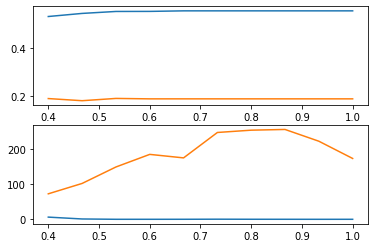

In [4]:
from evaluation import evaluate_segmenter
from algorithms import simple, graphseg
from datasets import EmbeddedDataset
import matplotlib.pyplot as plt
import numpy as np
import time
Ms, Ms2 = [], []
Ts,Ts2 = [], []
l = np.linspace(0.4,1,num=10)
for n in l:
    gs = graphseg.with_params(threshold = n,n_min_seg = 3,clique_finder='precise')
    gs2 = graphseg.with_params(threshold = n,n_min_seg = 3,clique_finder='clique_removal')
    with EmbeddedDataset('wiki_segments.npz') as ds:
        start = time.time()
        p1,w1 = evaluate_segmenter(ds,gs,4)
        end = time.time()
        Ts.append(end - start)
        start = time.time()
        p2,w2 = evaluate_segmenter(ds,gs2,4)
        end = time.time()
        Ts2.append(end - start)
    Ms.append(np.mean(w1))
    Ms2.append(np.std(w2))
    
plt.subplot(211)
plt.plot(l,Ms)
plt.plot(l,Ms2)
plt.subplot(212)
plt.plot(l,Ts)
plt.plot(l,Ts2)


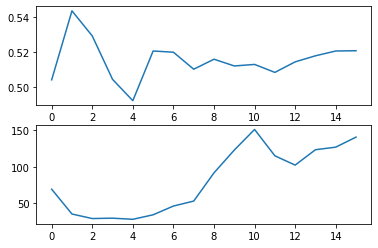

In [4]:
plt.subplot(211)
plt.plot(Ms)
plt.subplot(212)
plt.plot(Ts)

Evaluating segmenter...
Evaluating:[..........][50/50] => DONE [0h 0min 0s][eta: 0h 0min 0s]   0min 0s]    
Pmean: 0.4299190613661345 Pstv: 0.16259918746584023
Wmean: 0.5240880388000552 Wstv: 0.14721276019145885
Evaluating segmenter done in 0.43 s


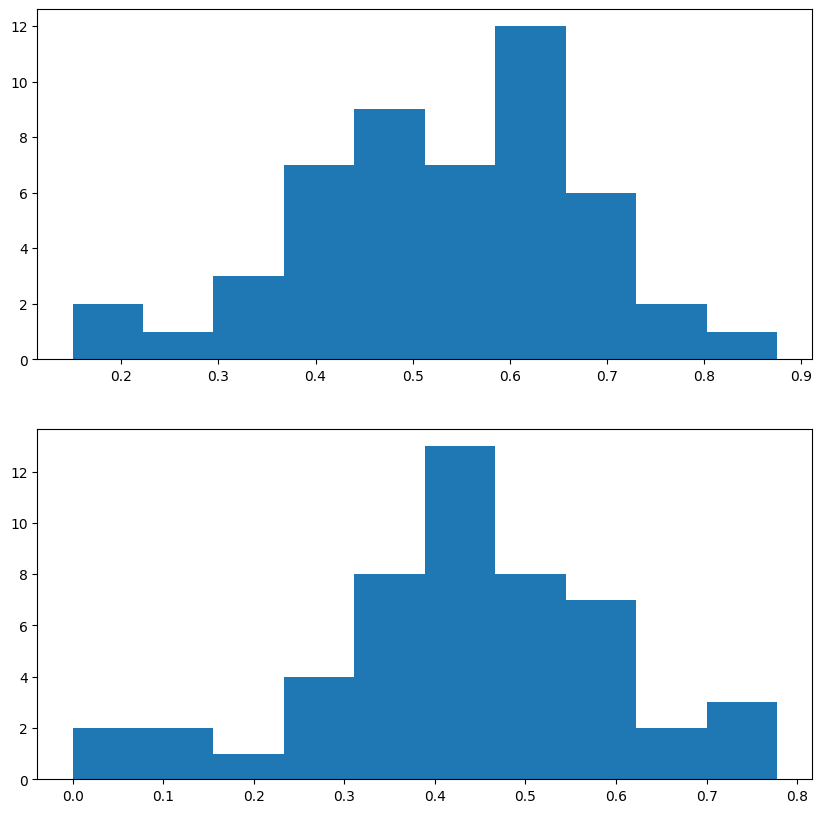

In [10]:
from evaluation import evaluate_segmenter
from algorithms import simple, graphseg
from datasets import EmbeddedDataset
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
with EmbeddedDataset('wiki_segments.npz') as ds:
    p,w = evaluate_segmenter(ds,lol,4)
    plt.subplot(2,1,1)
    plt.hist(w)
    plt.subplot(2,1,2)
    plt.hist(p)
 


Evaluating:[..........][300/300] => DONE [0h 0min 1s][eta: 0h 0min 0s]   0min 0s]    
Evaluating:[..........][300/300] => DONE [0h 0min 1s][eta: 0h 0min 0s]   0min 0s]    
Evaluating:[..........][300/300] => DONE [0h 0min 1s][eta: 0h 0min 0s]   0min 0s]    
Evaluating:[..........][127/127] => DONE [0h 0min 0s][eta: 0h 0min 0s]   0h 0min 0s][eta: 0h 0min 0s]   
Evaluating:[..........][127/127] => DONE [0h 0min 0s][eta: 0h 0min 0s]   0h 0min 0s][eta: 0h 0min 0s]   
Evaluating:[..........][127/127] => DONE [0h 0min 0s][eta: 0h 0min 0s]   0h 0min 0s][eta: 0h 0min 0s]   
0.47265466716185356 0.45548822176280773 0.6348535344237227


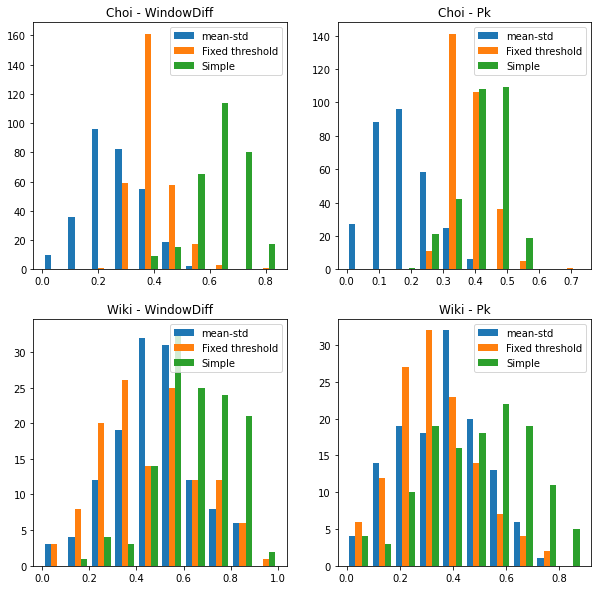

In [3]:
from evaluation import evaluate_segmenter
from algorithms import simple, graphseg, block_comparison
from datasets import EmbeddedDataset
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 10))
gs = block_comparison.with_params(cmp_mode='acos', block_size=3, block_mode='max')
bs = block_comparison.with_params(cmp_mode='cos', block_size=5,threshold=0.6)



with EmbeddedDataset('choi_segments.npz') as ds:
    p1,w1 = evaluate_segmenter(ds,gs,4)
    p2,w2 = evaluate_segmenter(ds,bs,4)
    p3,w3 = evaluate_segmenter(ds,simple.simple_seg,4)

    ax = plt.subplot(2,2,1)
    ax.title.set_text("Choi - WindowDiff")
    plt.hist([w1,w2,w3], label = ["mean-std", "Fixed threshold", "Simple"])
    plt.legend()

    ax = plt.subplot(2,2,2)
    ax.title.set_text("Choi - Pk")
    plt.hist([p1,p2,p3], label = ["mean-std", "Fixed threshold", "Simple"])
    plt.legend()

with EmbeddedDataset('wiki_segments_trans_300.npz') as ds:
    p1,w1 = evaluate_segmenter(ds,gs,4)
    p2,w2 = evaluate_segmenter(ds,bs,4)
    p3,w3 = evaluate_segmenter(ds,simple.simple_seg,4)
    ax = plt.subplot(2,2,3)
    ax.title.set_text("Wiki - WindowDiff")
    plt.hist([w1,w2,w3], label = ["mean-std", "Fixed threshold", "Simple"])
    plt.legend()

    ax = plt.subplot(2,2,4)
    ax.title.set_text("Wiki - Pk")
    plt.hist([p1,p2,p3], label = ["mean-std", "Fixed threshold", "Simple"])
    plt.legend()
    print(np.mean(w1),np.mean(w2),np.mean(w3))




In [5]:
from sklearn.model_selection import ParameterGrid
import numpy as np
from datasets import EmbeddedDataset
from algorithms import block_comparison
from evaluation import evaluate_segmenter
import matplotlib.pyplot as plt
import joblib
import pandas as pd

block_grid = ParameterGrid({'block_size':np.arange(1,5),'std_cutoff':[0.25,0.5,1.0,1.25,1.5,2.0,2.5,3.0] , 'whiten':[False], 'cmp_mode':['dot','cos','acos'], 'block_mode':['max','mean','sum','v-mean'], 'substract_mean':[False], 'check_minimum':[True]})
#block_grid = ParameterGrid({'block_size':[2,3,4],'std_cutoff':[0.25,0.5,1.0,1.25,1.5,2.0,2.5,3.0] ,'check_minimum':[True],'whiten':[False], 'cmp_mode':['acos'], 'block_mode':['max'], 'substract_mean':[False]})
Ms, Sts = [], []
Ps = []
Results = []
def fast_stat(arr):
    m = np.mean(arr)
    c = arr - m
    return m,np.dot(c,c)/a.size

def ev_seg_params(params,ds):
    bs = block_comparison.with_params(**p)
    w,_ = evaluate_segmenter(ds,bs,4,silent = True)
    return fast_stat(w)



with EmbeddedDataset('wiki_segments_trans_300.npz') as ds:
    for p in block_grid:
        bs = block_comparison.with_params(**p)
        w,pk,d = evaluate_segmenter(ds,bs,ds.mean_segment_length()//2,silent = True,seg_diff=True)
        Ms.append(np.mean(w))
        Sts.append(np.std(w))
        Results.append(p | { "windowdiff_mean":Ms[-1], "windowdiff_std":Sts[-1], "pk_mean":np.mean(pk),"pk_std":np.std(pk), "mean_seg_bias":np.mean(d), "std_seg_bias":np.std(d)})
        print(f'params:{p}, mean:{Ms[-1]}, std:{Sts[-1]}')

df = pd.DataFrame(Results)
df.to_csv("gridsearch-wiki-3001.csv")
Ms, Sts = [], []
Ps = []
Results = []
with EmbeddedDataset('choi_segments.npz') as ds:
    for p in block_grid:
        bs = block_comparison.with_params(**p)
        w,pk,d = evaluate_segmenter(ds,bs,ds.mean_segment_length()//2,silent = True,seg_diff=True)
        Ms.append(np.mean(w))
        Sts.append(np.std(w))
        Results.append(p | { "windowdiff_mean":Ms[-1], "windowdiff_std":Sts[-1], "pk_mean":np.mean(pk),"pk_std":np.std(pk), "mean_seg_bias":np.mean(d), "std_seg_bias":np.std(d)})
        print(f'params:{p}, mean:{Ms[-1]}, std:{Sts[-1]}')

df = pd.DataFrame(Results)
df.to_csv("gridsearch-choi1.csv")
Ms, Sts = [], []
Ps = []
Results = []  
with EmbeddedDataset('pl_cnn.npz') as ds:
    for p in block_grid:
        bs = block_comparison.with_params(**p)
        w,pk,d = evaluate_segmenter(ds,bs,ds.mean_segment_length()//2,silent = True,seg_diff=True)
        Ms.append(np.mean(w))
        Sts.append(np.std(w))
        Results.append(p | { "windowdiff_mean":Ms[-1], "windowdiff_std":Sts[-1], "pk_mean":np.mean(pk),"pk_std":np.std(pk), "mean_seg_bias":np.mean(d), "std_seg_bias":np.std(d)})
        print(f'params:{p}, mean:{Ms[-1]}, std:{Sts[-1]}')
        


df = pd.DataFrame(Results)
df.to_csv("gridsearch-plcnn1.csv")
df




params:{'block_mode': 'max', 'block_size': 1, 'check_minimum': True, 'cmp_mode': 'dot', 'std_cutoff': 0.25, 'substract_mean': False, 'whiten': False}, mean:0.4847004970002772, std:0.13600100374936835
params:{'block_mode': 'max', 'block_size': 1, 'check_minimum': True, 'cmp_mode': 'dot', 'std_cutoff': 0.5, 'substract_mean': False, 'whiten': False}, mean:0.4619188174025138, std:0.140955544222614
params:{'block_mode': 'max', 'block_size': 1, 'check_minimum': True, 'cmp_mode': 'dot', 'std_cutoff': 1.0, 'substract_mean': False, 'whiten': False}, mean:0.40511489135155054, std:0.1318652050216298
params:{'block_mode': 'max', 'block_size': 1, 'check_minimum': True, 'cmp_mode': 'dot', 'std_cutoff': 1.25, 'substract_mean': False, 'whiten': False}, mean:0.3855267934051309, std:0.15136220171789655
params:{'block_mode': 'max', 'block_size': 1, 'check_minimum': True, 'cmp_mode': 'dot', 'std_cutoff': 1.5, 'substract_mean': False, 'whiten': False}, mean:0.3586783076045131, std:0.16343938482823134
param

,block_mode,block_size,check_minimum,cmp_mode,std_cutoff,substract_mean,whiten,windowdiff_mean,windowdiff_std,pk_mean,pk_std,mean_seg_bias,std_seg_bias
0,max,1,True,dot,0.25,False,False,0.536907,0.168266,0.983441,0.029529,27.48,7.725904
1,max,1,True,dot,0.50,False,False,0.534375,0.164166,0.959418,0.045496,23.33,6.890653
2,max,1,True,dot,1.00,False,False,0.528619,0.142184,0.821071,0.085663,12.79,4.508425
3,max,1,True,dot,1.25,False,False,0.508007,0.123093,0.680575,0.110874,7.14,3.504340
4,max,1,True,dot,1.50,False,False,0.497947,0.124473,0.553222,0.113045,2.09,2.293883
...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,v-mean,4,True,acos,1.25,False,False,0.469655,0.137440,0.608438,0.125566,4.63,2.693158
380,v-mean,4,True,acos,1.50,False,False,0.460422,0.130760,0.539844,0.129214,1.90,2.247221
381,v-mean,4,True,acos,2.00,False,False,0.466233,0.149020,0.489612,0.148182,-1.36,1.711841
382,v-mean,4,True,acos,2.50,False,False,0.461069,0.145138,0.494181,0.147280,-1.30,1.878829


wiki segs: 8.01742744983524 (6.234283005029803)
choi segs: 7.032333333333333 (0.8267131035344459)
pl segs: 31.61497619047619 (21.299488762648775)


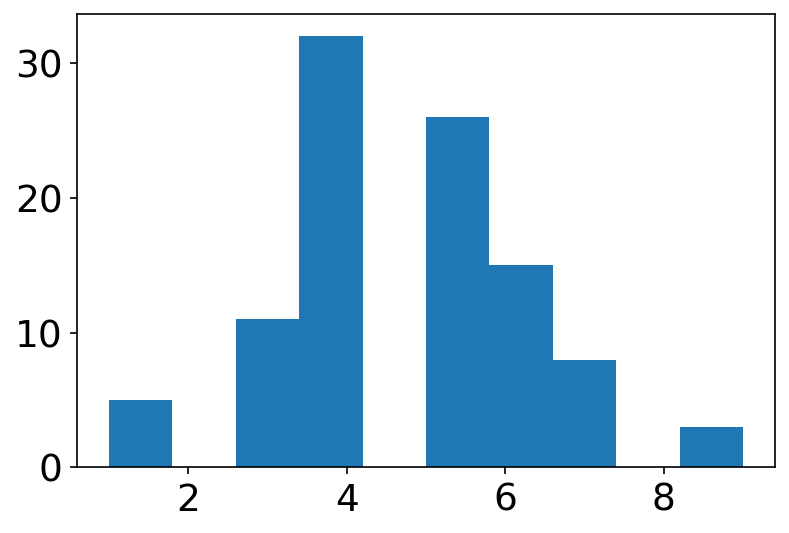

In [18]:
from datasets import EmbeddedDataset
import numpy as np
with EmbeddedDataset('wiki_segments_trans_300.npz') as ds:
   print(f"wiki segs: {np.mean(ds.document_lengths()/ds.segment_lengths())} ({np.std(ds.document_lengths()/ds.segment_lengths())})")


with EmbeddedDataset('choi_segments.npz') as ds:
    print(f"choi segs: {np.mean(ds.document_lengths()/ds.segment_lengths())} ({np.std(ds.document_lengths()/ds.segment_lengths())})")

with EmbeddedDataset('pl_cnn.npz') as ds:
    print(f"pl segs: {np.mean(ds.document_lengths()/ds.segment_lengths())} ({np.std(ds.document_lengths()/ds.segment_lengths())})")
    plt.hist(ds.segment_lengths())

In [4]:
import evaluation
from algorithms import block_comparison, segments
from datasets import EmbeddedDataset
import numpy as np

plbest = block_comparison.with_params(block_mode = 'mean', cmp_mode='dot', block_size=4,std_cutoff=1.5)
Ws,Ds = [], []
with EmbeddedDataset('pl_cnn.npz') as ds:
    for emb in ds.get_embeddings():
        seg =  ds.segmentation(emb)
        inferred = plbest(ds[emb])
        seg_true = segments.tags_to_array(ds[seg])
        p, w = evaluation.evaluate_document(seg_true,inferred,ds.mean_segment_length()//2)
        Ws.append(w)
        Ds.append(evaluation.get_n_seg_diff(seg_true,inferred))
    i = np.argmin(Ws)
    print(ds.get_embeddings()[i])
    print(Ws[i])

23_Wydobywanie_struktury/200112_oczy_przeslonie.txt_emb
0.10655737704918032


In [7]:
from datasets import small_pl
import evaluation
from algorithms import block_comparison, segments
from datasets import EmbeddedDataset
import numpy as np

with EmbeddedDataset('pl_cnn.npz') as ds:
    emb = '23_Wydobywanie_struktury/200108_na_marsa_przez_.txt_emb'
    seg =  ds.segmentation(emb)
    inferred = plbest(ds[emb])
    seg_true = segments.tags_to_array(ds[seg])
    p, w = evaluation.evaluate_document(seg_true,inferred,ds.mean_segment_length()//2)
    print(ds.mean_segment_length()//2)
    print(segments.array_to_nltk(inferred))
    print(segments.array_to_nltk(seg_true))
    print(segments.array_to_nltk(segments.array_to_tags(seg_true)))
    print(w)


15
00000000000000000000000001000000010000000000000000000000000100000
00000000000000000100000000000000000000100000000000000000000000000
00000000000000000111111111111111111111222222222222222222222222222
0.5294117647058824


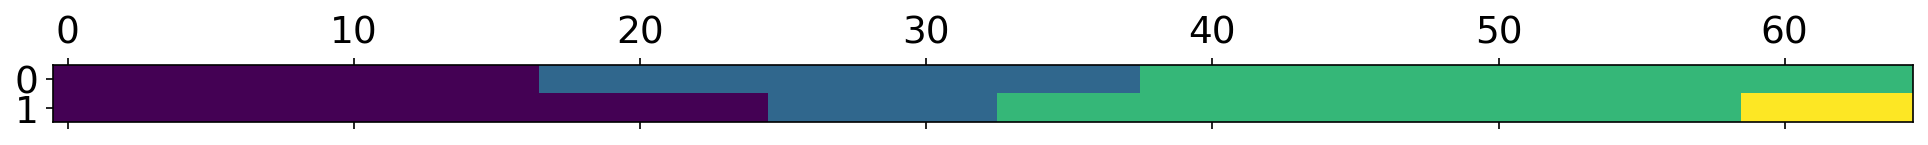

In [16]:
import matplotlib.pyplot as plt
plt.matshow([segments.array_to_tags(seg_true),segments.array_to_tags(inferred)])

In [4]:
from datasets import EmbeddedDataset
import numpy as np
with EmbeddedDataset('wiki_segments_trans_300.npz') as ds:
   print(f"wiki segs: {np.mean(ds.segment_lengths())} ({np.std(ds.segment_lengths())})")


with EmbeddedDataset('choi_segments.npz') as ds:
    print(f"choi segs: {np.mean(ds.segment_lengths())} ({np.std(ds.segment_lengths())})")

with EmbeddedDataset('pl_cnn.npz') as ds:
    print(f"pl segs: {np.mean(ds.segment_lengths())} ({np.std(ds.segment_lengths())})")

wiki segs: 5.834645669291339 (3.6473780454914753)
choi segs: 10.0 (0.0)
pl segs: 4.69 (1.553673067282818)


In [6]:
# no minimum check
df.to_csv('gridsearch.csv')
m_i = np.argmin(Ms)
print(f'Minimal mean: {Ms[m_i]} std:{Sts[m_i]} for params: {block_grid[m_i]}')

Minimal mean: 0.36770079490099933 std:0.1605784975613248 for params: {'whiten': False, 'substract_mean': False, 'cmp_mode': 'acos', 'block_size': 3, 'block_mode': 'max'}


In [4]:
#minimum check 1 radius
df.to_csv('gridsearch-2.csv')
m_i = np.argmin(Ms)
print(f'Minimal mean: {Ms[m_i]} std:{Sts[m_i]} for params: {block_grid[m_i]}')

Minimal mean: 0.33109948180743826 std:0.16810576781234027 for params: {'whiten': False, 'substract_mean': False, 'std_cutoff': 2, 'cmp_mode': 'acos', 'check_minimum': True, 'block_size': 3, 'block_mode': 'max'}


(10, 2)
[[-0.28532156  0.95843184]
 [-0.79351944 -0.6085448 ]
 [-0.1542263   0.98803556]
 [-0.93755955  0.3478249 ]
 [-0.16058826  0.98702145]
 [ 0.64016664  0.76823604]
 [-0.9433011   0.3319385 ]
 [-0.77272487 -0.63474107]
 [ 0.09373005  0.99559766]
 [-0.6957825  -0.71825266]]
[0.5758334  1.3598466  0.71033096 0.35037056 0.7038886  1.5598905
 0.3672633  1.3932945  0.9590431  1.5069087 ]
4
[1 1 3 3 3 3 4 4 5 5]
[-0.35684052 -0.47888237  0.4882597   0.4938717   0.6554622  -0.34886274
  0.5182172  -0.7043743  -0.7803064 ]


array([0.5758334 , 1.3598466 , 0.71033096, 0.35037056, 0.7038886 ,
       1.5598905 , 0.3672633 , 1.3932945 , 0.9590431 , 1.5069087 ],
      dtype=float32)

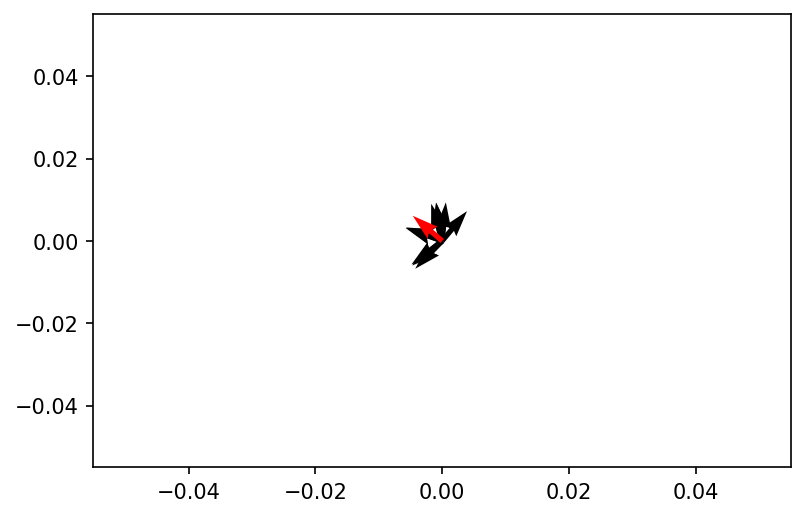

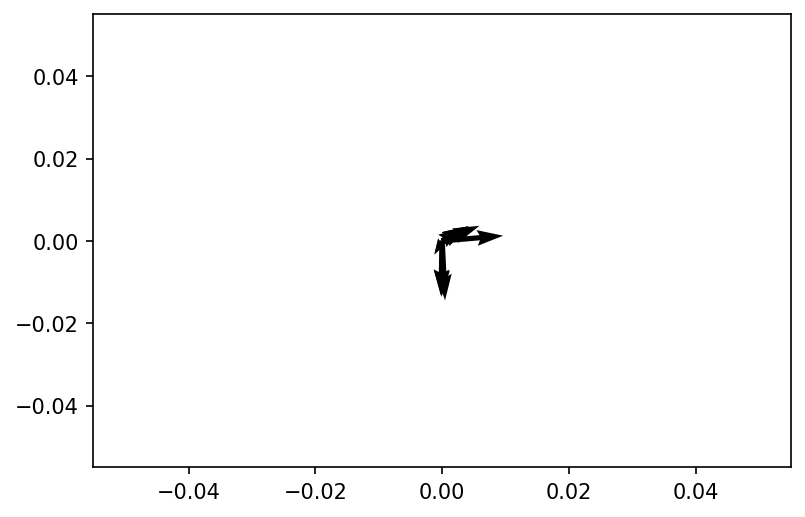

In [7]:
import matplotlib as mpl
from datasets import EmbeddedDataset
from sklearn.model_selection import ParameterGrid
import numpy as np
from datasets import EmbeddedDataset
from algorithms import block_comparison
from evaluation import evaluate_segmenter
import matplotlib.pyplot as plt
mpl.rcParams['figure.dpi'] = 150
with EmbeddedDataset('wiki_segments.npz') as ds:
    seg,emb = ds.get_file('data/6540154')
emb.shape
origin = np.zeros((2,len(emb)+1))
a = emb[:,0:2]
print(a.shape)

a /= np.sqrt(np.einsum('...i,...i', a,a))[:,np.newaxis]
s = np.sum(a,0)
s /= np.sqrt(s.dot(s.T))
print(a)
plt.quiver(*np.zeros((2,len(a))),a[:,0],a[:,1])
plt.quiver(0,0,*s,color='red')
plt.figure()
coss = np.arccos(np.array([(i.dot(s.T))/np.sqrt(i.dot(i)*s.dot(s)) for i in a]))
print(coss)
print((coss>1).sum())
print(seg)
a = a-s
v = emb[:,0:2]
sc = np.array([v[i].dot(v[i+1]) for i in range(len(v)-1)])
print(sc)
plt.quiver(*np.zeros((2,len(a))),a[:,0],a[:,1])
def angle_deviations(a):
    s = np.sum(a,0)
    s /= np.sqrt(s.dot(s.T))
    return np.arccos(np.array([(i.dot(s.T))/np.sqrt(i.dot(i)*s.dot(s)) for i in a]))
angle_deviations(v)

In [12]:
from algorithms import segments
with EmbeddedDataset('wiki_segments.npz') as ds:
    diff = 0.0
    i = 0
    for seg in ds.get_segments():
        i += 1
        emb = ds.embbeding(seg)
        print(f'{segments.count(ds[seg])} - {(angle_deviations(ds[emb]) > 1.3).sum()}')
        d = abs( segments.count(ds[seg])- (angle_deviations(ds[emb]) > 1).sum())
        print(d)
        diff += d

    print(diff/i)



7 - 8
25
6 - 3
26
3 - 2
14
4 - 0
20
3 - 1
11
4 - 7
47
4 - 0
9
5 - 4
25
3 - 0
2
7 - 11
69
10 - 5
24
6 - 5
44
8 - 4
20
59 - 84
310
6 - 11
32
4 - 0
6
19 - 24
70
9 - 6
11
6 - 7
80
6 - 19
60
4 - 2
15
22 - 36
165
3 - 2
10
3 - 0
7
37 - 57
186
11 - 25
86
6 - 12
33
3 - 1
10
3 - 1
2
6 - 7
49
4 - 2
6
4 - 4
22
8 - 12
36
6 - 10
25
3 - 0
26
8 - 7
51
6 - 2
12
4 - 0
6
5 - 3
8
4 - 2
12
3 - 0
3
3 - 0
3
3 - 1
5
3 - 1
14
13 - 21
83
4 - 4
18
7 - 3
32
5 - 16
50
4 - 1
9
10 - 11
50
38.78


In [31]:
from nltk.tokenize.texttiling import TextTilingTokenizer
import nltk
from datasets import wikiset
from evaluation import evaluate_document
import algorithms

nltk.download('stopwords')
lines = wikiset.get_unsegmented_lines(wikiset.get(),'data/988580')
text= '\n'.join(lines)
#print(text)
ttt = TextTilingTokenizer(demo_mode=True)
s, ss, d, ttSegmentation = ttt.tokenize(text)
with EmbeddedDataset('wiki_segments.npz') as ds:
   seg, emb = ds.get_file('data/988580')

simpleSegmentation = algorithms.simple_seg(emb)
sgsSegmentation = sbert_graphseg(emb)
print(len(lines))
print(segments.array_to_nltk(np.array(ttSegmentation)))
print(segments.array_to_nltk(segments.tags_to_array(seg)))
print(len(sgsSegmentation))
#evaluate_document(seg,ttSegmentation)



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Radek\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


f:\progs\python\magister\data\wiki_727K.tar.bz2 found: True
f:\progs\python\magister\data\wiki_test_50.tar.bz2 found: True
['data/111174', 'data/2640796', 'data/2917712', 'data/10037144', 'data/2952485', 'data/3275069', 'data/6146176', 'data/6544206', 'data/1928841', 'data/12720971', 'data/28187', 'data/7445232', 'data/109461', 'data/7674758', 'data/1198312', 'data/3384438', 'data/2025011', 'data/988580', 'data/149766', 'data/599217', 'data/3881783', 'data/2842974', 'data/31444', 'data/1057453', 'data/1276536', 'data/338825', 'data/9652769', 'data/582816', 'data/961796', 'data/1064845', 'data/380143', 'data/5160544', 'data/7150404', 'data/9387798', 'data/2651177', 'data/7370490', 'data/44426', 'data/6261767', 'data/426889', 'data/6540154', 'data/10648433', 'data/123319', 'data/4074782', 'data/32431', 'data/910628', 'data/8718322', 'data/751683', 'data/2070518', 'data/4823815', 'data/3475652']
149
000001000100010000100010001000010000001000100010000010000000001000000010001000000001000100